In [3]:
class Students(object):
    def __init__(self, happiness):
        self.happiness = happiness
        self.name = 'T GIS 501'
    def getHappy(self):
        print(self.name + ' students are ' + self.happiness + ' happy!')
        
you = Students('extremely')
you.getHappy()


        

T GIS 501 students are extremely happy!


# Lab 3
## Classes, ArcGIS API for Python, and a touch of GeoPandas

This lab is going to put you through some paces creating [functions](https://www.tutorialspoint.com/python/python_functions.htm) and [classes](https://docs.python.org/3/tutorial/classes.html) and then introduce you to the [ArcGIS API for Python](https://developers.arcgis.com/python/) and [GeoPandas](http://geopandas.org/). We're slowly building towards the relatively automted acquisition, manipulation, and visualization of spatial data from heterogeneous sources and that's something to be excited about!

As always, this lab scales the difficulty up a bit. If you're still working on lab 2, that's ok. You have two weeks here, take advantage of them - use the suggested texts, check the emails I've sent each Monday, come to office hours (or email me to set up a time). You can do this.

### Note: If you are wondering how to install GeoPandas and the ArcGIS API, take a look at lab 2. If you're having trouble creating environments and launching jupyter notebooks, look at lab 1.

### Problem 1: Constructing a person

Create a script that creates the class Person with the following properties:

1. The class should initialize with a name and a birthday, but the birthday should be set as None by default.
2. The class should have three methods: .getName(), .setBirthday(), and .getAge()
3. .getName() returns the name of the person, .setBirthday sets the birthday to a date, and .getAge() returns how many days old the Person is.
4. .getAge() (and therefore .setBirthday()) will require you to work with the datetime module. You can learn more about it [here](http://effbot.org/librarybook/datetime.htm)



### Problem 2: Happy birthday!

Now, you have to create a new class called song.


1. The class should take a variable (a string - make sure to check for this) and store it as lyrics
2. It should have a method, .sing(), which prints out the stored lyrics.

Additionally:

1. Every instance of the class person should now also include a methode .checkBirthday()
2. .checkBirthday() should see if today is someone's birthday and if so it should print out "Happy birthday to you. Happy birthday to you. Happy birthday dear Person_Name, happy birthday to you."
3. It must do this by using an instance of the Song class. In other words, the .checkBirthday() method is going to call up a specific instance of the Song class - how will you do that?

**Please note:** You do not need to take input in these scripts. Although, if you wish to set up something that does so, that is fine as well.

**Additional note:** In a notebook, if you run cells sequentially, classes/functions/etc. created in a previous cell will be callable in subsequent ones; however, if you're running into trouble, copy/paste your Person class down into this cell as well (You're going to be modifying it anyways...)

In [19]:
import datetime
from datetime import date 

class Person:
#Create person
    def __init__(self, name, lastName):
        self.name = name
        self.lastName = lastName
        self.birthdate = None
#create age
    def age(self):
        today = datetime.date.today()
        age = today.year - self.birthdate.year

        if today < datetime.date(today.year, self.birthdate.month, self.birthdate.day):
            age -= 1

        return age
#set birthdate
    def setbirthdate(self, year, month, day): 
        self.birthdate = datetime.date(year, month, day)
# make person     
person = Person(
    "Ryan",
    "Mitchell")
#set birthday
person.setbirthdate(1980, 10, 16)

    
# New checkBirthday method here    
def checkBirthdate(self):
        d = datetime.date.today()     # shorten datetime string
        md = d.month, d.day           # pull only month, day from today's date time
        if self.md == md:             # check against self birthday in mm/dd format
            honoree = self.name       # set var to Person instances particular name for use in song lyrics
            print(Song.sing(honoree))
            return self.birthdate
        else:
            return self.birthdate

# New Song object class, set instnace based on Person class
class Song(Person):
    
    # New method, calling name from honoree variable, defined in Person object
    def sing(honoree):
        lyrics = 'Happy birthday to you, happy birthday to you. Happy birthday' , honoree, 'Happy birthday to you.'
        # get rid of junk, not sure where this came from but, if I return the instance instead of print, they crop up
        return str(lyrics).replace("'", "").replace("(","").replace(")","") 

# Birthday = today
print(person.name, person.lastName)
print(person.birthdate())

Ryan Mitchell


TypeError: 'datetime.date' object is not callable

### Problem 3: FizzBuzz

There's an age-old programming 'challenge' called FizzBuzz. You'll often see it pop up as a very rudimentary screening against those who claim they can write code. You're going to solve a variant of it.

Create a **function** (call it fizzbuzz) which takes a single number as its parameter. The function then prints out every number from 1 to the input, **except** for numbers divisible by 3 it prints out "fizz", for numbers divisible by 5 it prints out "buzz", and for numbers divisible by 3 **and** 5 it prints out "fizzbuzz."

For example, the output for an input of 15 would look like: 1, 2, fizz, 4, buzz, fizz, 7, 8, fizz, buzz, 11, fizz, 13, 14, fizzbuzz **Output format doesn't matter (single line, multiple lines, etc.)**

A few notes:

1. You must take your input from **outside** of your function.
2. You must use a function
3. +1 bonus point if your script doesn't fail if I put in something other than a number (in other words, if you ask me for a number and I enter 'dog' your script asks me again... *aha! error catching!*)


In [3]:
fizzbuzz = []

while True:
    try:
        start = int(input('Start Value:'))
        end = int(input('End Value:'))
    except (ValueError):
        print('Numbers You Fool!')
    else:break
        
for i in range(start,end+1):
    entry = ''
    if i%3 == 0:
        entry += 'fizz'
    if i%5 == 0:
        entry += 'buzz'
    if i%3 != 0 and i%5 != 0:
        entry = i
    fizzbuzz.append(entry)

    
for i in fizzbuzz:
    print(i)

Start Value:1
End Value:21
1
2
fizz
4
buzz
fizz
7
8
fizz
buzz
11
fizz
13
14
fizzbuzz
16
17
fizz
19
buzz
fizz


## ArcGIS API for Python

From this point onwards in the lab, you need to be in an environment with the arcgis library installed.

You can (and *should*) read more about the API [here](https://developers.arcgis.com/python/). 

Let's begin, run the following cell:

In [6]:
import arcgis

myGIS = arcgis.GIS()
myGIS.map()

MapView(layout=Layout(height='400px', width='100%'))

You should get an interactive world map. Scroll around it a bit if you want. Bear in mind, this is **not** a map that you can easily embed into a web document, it has to be called using the python API, but... still, pretty cool.

Now, these next steps might throw up an error, because ESRI. Just run them again if they do.

In [6]:
#Technically, I don't need to keep importing the library, 
#but this is in case the cells end up being run out of order.
import arcgis

ttown = arcgis.geocode('Tacoma')
print(ttown)

[{'address': 'Tacoma, Washington', 'location': {'x': -122.44163999999995, 'y': 47.255130000000065}, 'score': 100, 'attributes': {'Loc_name': 'World', 'Status': 'T', 'Score': 100, 'Match_addr': 'Tacoma, Washington', 'LongLabel': 'Tacoma, WA, USA', 'ShortLabel': 'Tacoma', 'Addr_type': 'Locality', 'Type': 'City', 'PlaceName': 'Tacoma', 'Place_addr': 'Tacoma, Washington', 'Phone': '', 'URL': '', 'Rank': 5.5, 'AddBldg': '', 'AddNum': '', 'AddNumFrom': '', 'AddNumTo': '', 'AddRange': '', 'Side': '', 'StPreDir': '', 'StPreType': '', 'StName': '', 'StType': '', 'StDir': '', 'BldgType': '', 'BldgName': '', 'LevelType': '', 'LevelName': '', 'UnitType': '', 'UnitName': '', 'SubAddr': '', 'StAddr': '', 'Block': '', 'Sector': '', 'Nbrhd': '', 'District': '', 'City': 'Tacoma', 'MetroArea': 'Seattle Metro Area', 'Subregion': 'Pierce County', 'Region': 'Washington', 'RegionAbbr': 'WA', 'Territory': '', 'Zone': '', 'Postal': '', 'PostalExt': '', 'Country': 'USA', 'LangCode': 'ENG', 'Distance': 0, 'X': 

**Whoah, that's a lot of information**. 

Notice the data formats there. The top level is a list, then there are sub-items that are dictionaries, lists, etc. A list is ordered, so that means I can call the part I want like this:

In [7]:
import arcgis

ttown = arcgis.geocode('Tacoma')[0]

print(ttown)

{'address': 'Tacoma, Washington', 'location': {'x': -122.44163999999995, 'y': 47.255130000000065}, 'score': 100, 'attributes': {'Loc_name': 'World', 'Status': 'T', 'Score': 100, 'Match_addr': 'Tacoma, Washington', 'LongLabel': 'Tacoma, WA, USA', 'ShortLabel': 'Tacoma', 'Addr_type': 'Locality', 'Type': 'City', 'PlaceName': 'Tacoma', 'Place_addr': 'Tacoma, Washington', 'Phone': '', 'URL': '', 'Rank': 5.5, 'AddBldg': '', 'AddNum': '', 'AddNumFrom': '', 'AddNumTo': '', 'AddRange': '', 'Side': '', 'StPreDir': '', 'StPreType': '', 'StName': '', 'StType': '', 'StDir': '', 'BldgType': '', 'BldgName': '', 'LevelType': '', 'LevelName': '', 'UnitType': '', 'UnitName': '', 'SubAddr': '', 'StAddr': '', 'Block': '', 'Sector': '', 'Nbrhd': '', 'District': '', 'City': 'Tacoma', 'MetroArea': 'Seattle Metro Area', 'Subregion': 'Pierce County', 'Region': 'Washington', 'RegionAbbr': 'WA', 'Territory': '', 'Zone': '', 'Postal': '', 'PostalExt': '', 'Country': 'USA', 'LangCode': 'ENG', 'Distance': 0, 'X': -

See that last entry? 'extent' - we're going to use that to set the extent of the map we create to our favorite dusty old jewel (again, sometimes you'll get a 'nonetype' error here, try running it again and if that *still* doesn't work, we'll troubleshoot).

In [2]:
import arcgis

ttown = arcgis.geocode('Tacoma')[0]

tgis = arcgis.GIS()

tmap = tgis.map()
tmap.extent = ttown['extent']

tmap

AttributeError: 'NoneType' object has no attribute '_tools'

### Nice!

There's a lot more that you can do with the ArcGIS API, but right now I want to show you how to interface with our own ArcGIS Online Environment right here in your notebook.

In [3]:
import arcgis

print('Test Time!')

#You need to enter your username and password as strings in the command below.
gis = arcgis.GIS('https://uwt-gis-geotech.maps.arcgis.com', 'YOUR_USERNAME', 'YOUR_PASSWORD')

print('Logged in as ' + str(gis.properties.user.username))

#Now, let's see what you have uploaded onto our AGOL!
mysearch = gis.content.search(query='owner: YOUR_USERNAME', item_type='Feature Layer')
#Again, you need to substitute your username in the above. For this example, I'm using Greg's.
#DO NOT TURN IN A NOTEBOOK WITH YOUR USERNAME AND PASSWORD
#YOU WILL LOSE POINTS


#The following loops through every layer that belongs to the username 
#and displays a summary of it.
for item in mysearch:
    display(item)
    


Test Time!


Unable to generate token.
Invalid username or password.
Invalid username or password.


RuntimeError: Unable to generate token.
Invalid username or password.
Invalid username or password.
(Error Code: 400)

Depending on what you've uploaded to our AGOL, you'll see different features listed above. You can add them to your map. In the cell below, I'm going to add a very simple layer that a student in the MS created at the beginning of his capstone project.

For you to add your layers, you would change the name and login information accordingly.


<Item title:"Tacoma Final Report 2365 Prediction" type:Feature Layer Collection owner:gjbcuw>
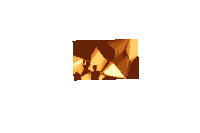

<Item title:"Foreclosure_Pierce" type:Feature Layer Collection owner:gjbcuw>
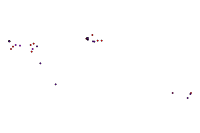

<Item title:"GSI in Tacoma_fieldworker" type:Feature Layer Collection owner:kangds_MSGT>

<Item title:"Lead Sample Locations within 7.5-Mile Buffer of Smelter" type:Feature Layer Collection owner:apsmcd6>
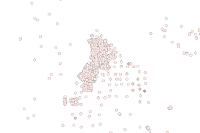

<Item title:"Tacoma" type:Feature Layer Collection owner:ninak83_UWT_GIS_Cert>

<Item title:"TREES" type:Feature Layer Collection owner:MSGT_16_leafe>
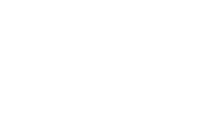

<Item title:"GSI_ELIGIBILITY" type:Feature Layer Collection owner:kangds_MSGT>
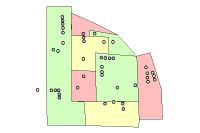

<Item title:"UWT_Trees_AOI" type:Feature Layer Collection owner:MSGT_16_reuben>
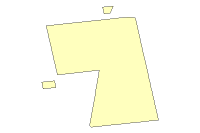

<Item title:"Parcels in Tacoma floodplains and 500ft buffers" type:Feature Layer Collection owner:zzli@uw.edu>
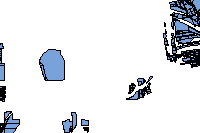

<Item title:"Hazards" type:Feature Layer Collection owner:kbogue137>
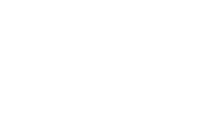

In [10]:
import arcgis

def mapextent(location):
    '''A very simple function that returns the map extent coordinates 
    for a string fed into it'''
    
    x = arcgis.geocode(location)[0]
    return x['extent']

#We're going to set our GIS as our online account
#This means we WILL be using credits, so be careful!

gis = arcgis.GIS('https://uwt-gis-geotech.maps.arcgis.com', 'YOUR_USERNAME', 'YOUR_PASSWORD')
tmap = gis.map()
tmap.extent = mapextent('Tacoma') #I call the function and pass it the string 'Tacoma'

#Now I'm going to search for the layer I want and then add it to the map.

tacomalayers = gis.content.search('Tacoma', 'feature_service', max_items=10)
for item in tacomalayers:
    display(item)

**Note:** You will get different results than I did, I'm an admin, you aren't.

Also, note, the results come as an ordered list. So, I can call them in various ways. Here, I'm going to call the fourth entry of that list and add it to my map. It's a lead sample maps.

In [26]:
tmap.add_layer(tacomalayers[3])

#and now let's look at it
tmap

NameError: name 'tacomalayers' is not defined

Try clicking around.

Notice how you could, for example, add a whole host of layers using iteration. Now, we're going to learn a bit about processing. 

Now, it's time to jump into some data manipulation. We'll be taking a csv (comma separated value - a common form of flat-file data), manipulating it into something that can be displayed spatially, and then adding it to a map. We'll then also do some basic geoprocessing on it.

That sounds like a lot, but you have all the tools to do this. Use pseudocode, break problems apart. Work together! Be creative - break things!

In the files repository (where you found this notebook and not where you will upload it once completed), you'll find two .csv files that I grabbed from the [Results253](https://data.cityoftacoma.org/) website: Museums_in_Tacoma.csv and Tacoma_Parks.csv.

We're going to use a library called [pandas](https://pandas.pydata.org/) to process this data and then add it to our map. I'll be doing the early steps, but you'll be asked to write the final scripts yourself.

**Please note, I assume you have downloaded the csvs to the local directory where you also have this lab. You can review previous labs on how to handle file locations**

Also note, if you installed the arcgis library and geopandas (as you need to have), pandas is already installed. If you get a `ModuleNotFoundError`, just go manually install it like any other library.


In [3]:
import pandas

parks = pandas.read_csv('Tacoma_Parks.csv')
parks.head()

,Park Name,Park Description,Park Location
0,Manitou Park,"Established in 1915, what was once a tourist c...","4408 S. Manitou Park\r\nTacoma, WA"
1,McKinley Park,Pathways among the trees and new playground eq...,"907 Upper Park St.\r\nTacoma, WA"
2,Oak Tree Park,Oak Tree Park is a 25 acre parcel that compris...,"S 74th and Cedar St.\r\nTacoma, WA"
3,Puget Creek Natural Area,"At 66-acres, this natural area has one of only...","N. Alder Way &amp; N. Lawrence St.\r\nTacoma, WA"
4,Ruston Way,This two-mile long scenic waterfront with pano...,"Ruston Way\r\nTacoma, WA"


In [4]:
museums = pandas.read_csv('Museums_in_Tacoma.csv')
museums.head()

,Name,Address,"City, State and ZIP Code",Location,Website
0,Children's Museum of Tacoma,1501 Pacific Ave,"Tacoma, WA 98402","1501 Pacific Ave\r\nTacoma, WA 98402\r\n(47.24...",Website (http://www.playtacoma.org/)
1,Museum of Glass,1801 Dock St,"Tacoma, WA 98402","1801 Dock St\r\nTacoma, WA 98402\r\n(47.245401...",Website (http://museumofglass.org/visit)
2,Washington State History Museum,1911 Pacific Ave,"Tacoma, WA 98402","1911 Pacific Ave\r\nTacoma, WA 98402\r\n(47.24...",Website (http://www.washingtonhistory.org/visi...
3,Foss Waterway Seaport,705 Dock St,"Tacoma, WA 98402","705 Dock St\r\nTacoma, WA 98402\r\n(47.257877,...",Website (http://www.fosswaterwayseaport.org/)
4,Tacoma Art Museum,1701 Pacific Ave,"Tacoma, WA 98402","1701 Pacific Ave\r\nTacoma, WA 98402\r\n(47.24...",Website (http://www.tacomaartmuseum.org/)


What you should see is a nicely formatted table of the first five entries (the 'head') of each data set. Pandas is extremely powerful and has done some of the formatting for us.

Take a look at that the columns, does one seem to have location information in it? Wouldn't it be useful to be able to geocode said information and add it to a map?

I'm going to show you how to do this for the museums dataset and then leave you to figure out how to do so for the parks one (there's a trick to the parks file... what do you think happens when there's a space in a column name?)


In [5]:
import pandas, arcgis

def mapextent(location):
    '''A very simple function that returns the map extent coordinates for a string fed into it'''
    x = arcgis.geocode(location)[0]
    return x['extent']

#Setting up our base map.
gis = arcgis.GIS('https://uwt-gis-geotech.maps.arcgis.com', 'rmitch24', 'mitchwich24')
tmap = gis.map()
tmap.extent = mapextent('Tacoma') #I call the function and pass it the string 'Tacoma'


#We can import pandas data fields into the ArcGIS library so long as we set an 'address' field.
museumsgis = gis.content.import_data(museums, {'Address' : 'Location'})
tmap.add_layer(museumsgis)

tmap

MapView(layout=Layout(height='400px', width='100%'))

### Problem 4: Display both layers on a single map.

+1 bonus points if you display them in different colors.

In [22]:
import arcgis, pandas



def mapextent(location):
    '''A very simple function that returns the map extent coordinates for a string fed into it'''
    x = arcgis.geocode(location)[0]
    return x['extent']

#Setting up our base map.
gis = arcgis.GIS('https://uwt-gis-geotech.maps.arcgis.com', 'rmitch24', 'mitchwich24')
tmap = gis.map()
tmap.extent = mapextent('Tacoma') #I call the function and pass it the string 'Tacoma'


#We can import pandas data fields into the ArcGIS library so long as we set an 'address' field.
museumsgis = gis.content.import_data(museums, {'Address' : 'Location'})
tmap.add_layer(museumsgis)

parksgis = gis.content.import_data(parks, {'Address' : 'Park_Location'})
tmap.add_layer(parksgis)

tmap

MapView(layout=Layout(height='400px', width='100%'))

**Good work!**

Ok, now let's do some spatial analysis. You'll want to read up on the arcgis.features module, you can find that information [here](https://esri.github.io/arcgis-python-api/apidoc/html/arcgis.features.toc.html).

There are a lot of ways to do this and the way we're going to do it is just one. We'll be using the arcgis.features.analysis.find_nearest() tool.

In [23]:
import arcgis, pandas

#First, as above, we'll set up our map and add in our feature.
def mapextent(location):
    '''A very simple function that returns the map extent coordinates for a string fed into it'''
    x = arcgis.geocode(location)[0]
    return x['extent']

#Setting up our base map.
gis = arcgis.GIS('https://uwt-gis-geotech.maps.arcgis.com', 'rmitch24', 'mitchwich24')
tmap = gis.map()
tmap.extent = mapextent('Tacoma') #I call the function and pass it the string 'Tacoma'

#We can import pandas data fields into the ArcGIS library so long as we set an 'address' field.
museumsgis = gis.content.import_data(museums, {'Address' : 'Location'})

#LIKE BEFORE, YOU NEED TO ADD IN THE PARKS LAYER HERE!
parksgis = gis.content.import_data(parks, {'Address' : 'Park_Location'})

#Now, we're going to use the find_nearest sub-module of the arcgis.features.analysis module!
nearestpark = arcgis.features.analysis.find_nearest(museumsgis, parksgis, max_count=1)

print(nearestpark)

{'nearest_layer': <FeatureCollection>, 'connecting_lines_layer': <FeatureCollection>}


Hmmm, what's going on there? It looks like the find_nearest() command returns a dictionary of two feature classes.

(Note: I used max_count=1 to set it so that for each result, only the absolutely shortest pair was returned).

Let's add our museums, our parks, and the lines that connect the shortest pairs together.

### Problem 5: Museum and park pairs.

Display a map that has each museum connected to the park to which it is closest.

+1 bonus point if you use driving distance (this is a parameter you can pass to the find_nearest() function).

In [30]:
import arcgis, pandas

def mapextent(location):
    '''A very simple function that returns the map extent coordinates for a string fed into it'''
    x = arcgis.geocode(location)[0]
    return x['extent']

#Setting up our base map.
gis = arcgis.GIS('https://uwt-gis-geotech.maps.arcgis.com', 'rmitch24', 'mitchwich24')
tmap = gis.map()
tmap.extent = mapextent('Tacoma') #I call the function and pass it the string 'Tacoma'


#We can import pandas data fields into the ArcGIS library so long as we set an 'address' field.
museumsgis = gis.content.import_data(museums, {'Address' : 'Location'})
tmap.add_layer(museumsgis)

parksgis = gis.content.import_data(parks, {'Address' : 'Park_Location'})
tmap.add_layer(parksgis)

nearestpark = arcgis.features.analysis.find_nearest(museumsgis, parksgis, max_count=1,)
tmap.add_layer(nearestpark)

tmap

Exception: dict layers must have 'type' and 'url'

## That's it, you're done! 
### Next week, we'll work on GeoPandas *and* Folium

But, let's try a bonus question. 
**Full disclosure:** While I know this can be done, I haven't actually done it. The find_nearest() function doesn't allow for queries on it, so you might have to do this with an entirely different function. **That's why it's a bonus question**. 
#### Don't try this until you've finished the rest of the lab.

### Bonus Problem: Create a map that has on it **only** the shortest combined driving distance between the set of a school, a park, and a museum 

Put colloquially, you are going to drive from a school, to a park, and then to a museum and you need the **set** that has the lowest combined driving time between the three places (in that order school -> park -> museum).

**+4 points, partial credit possible**